**Main Questions**
1. What are the most common categories of complaints? - THEMING
2. Are there any noticeable changes from one time period to the next? - TRENDING
---

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
consumerAffairs = pd.read_csv("comcast_consumeraffairs_complaints.csv")
consumerAffairs

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
...,...,...,...,...
5654,"Brandye of San Ramon, CA","March 12, 2006",0,"Last year, we bought the Nascar In Car package..."
5655,"Paul of Chicago, IL","March 12, 2006",0,Their billing department is horrid. If you dec...
5656,"Autumn of Knoxville, TN","March 6, 2006",0,"Ordered ""On Demand"" movie for the 1st time in ..."
5657,"Tina of Villa Rica, GA","Feb. 22, 2006",0,I am being ripped of by Comcast Cable regardin...


# **Theming**

## *Preprocessing*

In [46]:
# Data preprocessing
import nltk

lemmatizer = nltk.WordNetLemmatizer()

stop_words = set(nltk.corpus.stopwords.words('english'))
remove = []
for word in remove:
    if word in stop_words:
        stop_words.remove(word)
customStopWords = [ "wa", "ha", "would", "get", "one", "could"]

def preprocess_text(text):
    tokens = nltk.tokenize.word_tokenize(str(text).lower())  # Convert to string and then separate words
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Lemmatization
    tokens = [token for token in tokens if token not in stop_words and token not in customStopWords]  # Stopwords removal

    return ' '.join(tokens) #rejoin

consumerAffairs['Cleaned_Text'] = consumerAffairs['text'].apply(preprocess_text)  #Add column to df

# Print original text and cleaned text side by side for the first 5 rows
for index, row in consumerAffairs.head(5).iterrows():
    print(f"Original Text: {row['text']}\nCleaned Text: {row['Cleaned_Text']}\n")

Original Text: I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity.
Cleaned Text: used love comcast constant update internet cable crash lot night sometimes day channel even work demand sometimes play either wish something min ago internet crashed min reason tired thinking switching wow something please xfinity

Original Text: I'm so over Comcast! The worst internet provider. I'm taking online classes and multiple times was late with my assignments because of the power interruptions in my area that lead to poor quality internet service. Definitely switching to Verizon. I'd rather pay $10 extra then dealing w/ Comcast an

In [47]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(consumerAffairs['Cleaned_Text'])

## *Kmeans*

In [48]:
from sklearn.cluster import KMeans

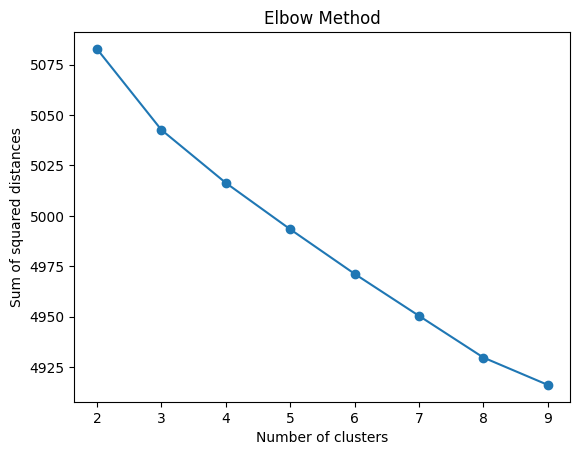

In [49]:
# range of cluster numbers to test
k_range = range(2, 10)

# Calculate sum of squared distances for each k
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

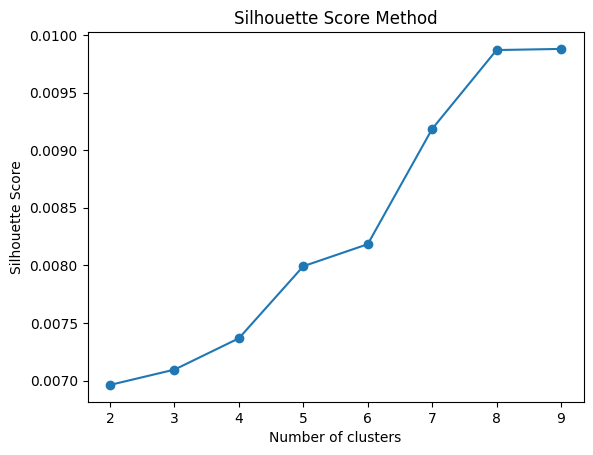

In [50]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [51]:
# Clustering
k = 6  # Number of clusters 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to a copy of the original DataFrame
consumerAffairs_clustered = consumerAffairs.copy(deep=True)
consumerAffairs_clustered['Cluster'] = kmeans.labels_
consumerAffairs_clustered = consumerAffairs_clustered.sort_values(by='Cluster')

for index, row in consumerAffairs_clustered.head(5).iterrows():
    print(f"Original Text: {row['text']}")

consumerAffairs_clustered

Original Text: I used to love Comcast. Until all these constant updates. My internet and cable crash a lot at night, and sometimes during the day, some channels don't even work and on demand sometimes don't play either. I wish they will do something about it. Because just a few mins ago, the internet have crashed for about 20 mins for no reason. I'm tired of it and thinking about switching to Wow or something. Please do not get Xfinity.
Original Text: nan
Original Text: nan
Original Text: nan
Original Text: nan


,author,posted_on,rating,text,Cleaned_Text,Cluster
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,used love comcast constant update internet cab...,0
1328,"Cynthia of Poca, WV","Feb. 18, 2007",0,NaN,nan,0
1327,"Wesley of Pittsburgh, PA","Feb. 28, 2007",0,NaN,nan,0
1326,"Dennis of Sewell, NJ","March 1, 2007",0,NaN,nan,0
1325,"W of Morton Grove, IL","March 6, 2007",0,NaN,nan,0
...,...,...,...,...,...,...
4745,"Michael of Maynard, MA","March 23, 2010",0,I ordered the Comcast triple play for $99 a mo...,ordered comcast triple play month service mont...,5
2634,"Marcus of Hayward, CA","May 18, 2015",1,"Just over a year ago, I initiated a chat sessi...",year ago initiated chat session comcast questi...,5
3634,"Robert of Peru, IL","March 23, 2014",1,Was charged for a modem that I returned when I...,charged modem returned bought wife pay bill no...,5
2635,"Dorothy of Irwin, Other","May 18, 2015",1,They have been over charging me for the past s...,charging past six month called march talked th...,5


In [52]:
# Print common categories of complaints
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
print("Top terms per cluster:")
for i in range(k):
    print(f"Cluster {i}: ", end="")
    print(", ".join([terms[ind] for ind in order_centroids[i, :15]]))

Top terms per cluster:
Cluster 0: service, comcast, customer, time, internet, cable, company, problem, phone, call, year, month, never, tv, business
Cluster 1: speed, modem, internet, comcast, service, mbps, connection, time, month, problem, high, customer, cable, technician, tech
Cluster 2: account, comcast, service, payment, told, bill, credit, called, call, collection, number, equipment, time, customer, phone
Cluster 3: box, channel, cable, comcast, tv, service, hd, digital, told, new, month, customer, dvr, time, said
Cluster 4: service, call, called, comcast, day, tech, told, appointment, phone, said, technician, time, back, cable, come
Cluster 5: bill, month, service, comcast, told, charge, fee, pay, customer, year, called, contract, internet, call, phone


C:\Users\Arnav\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



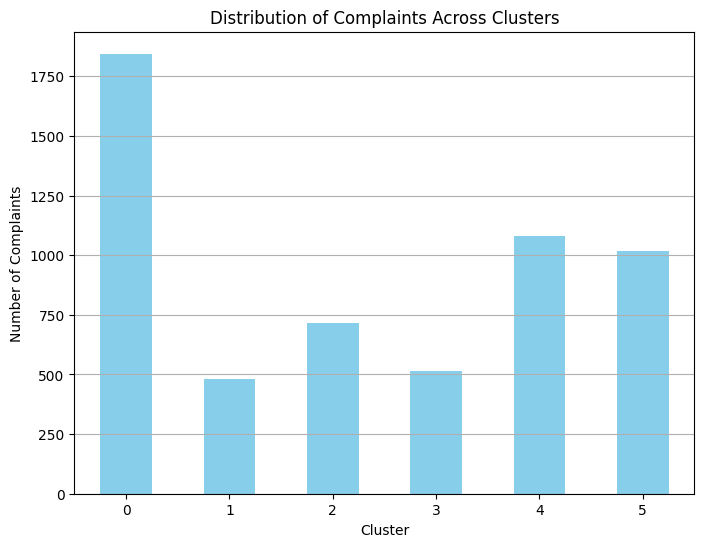

In [53]:
# Count complaints per cluster
cluster_counts = consumerAffairs_clustered['Cluster'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaints Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## *LDA*

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# bag of words vectorizer
#vectorizer = CountVectorizer(max_features=1000)
#X = vectorizer.fit_transform(consumerAffairs['Cleaned_Text'])

In [55]:
from sklearn.decomposition import LatentDirichletAllocation

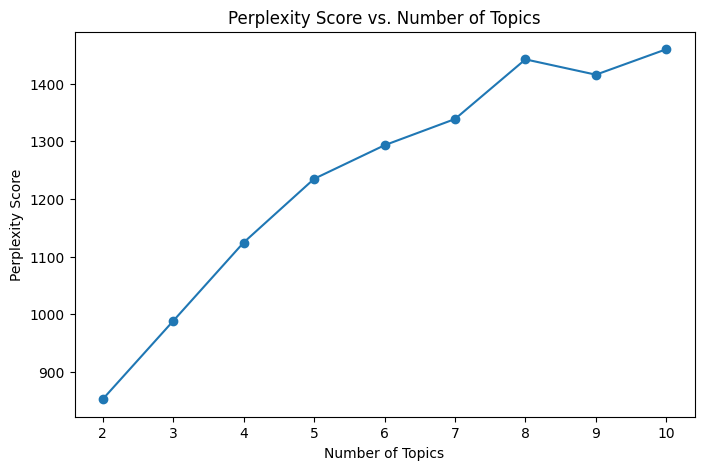

In [56]:
# Define a range of candidate numbers of topics
min_topics, max_topics = 2, 10

# Evaluate perplexity for different numbers of topics
perplexity_scores = []
for num_topics in range(min_topics, max_topics + 1):
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tfidf_matrix)
    perplexity_score = lda_model.perplexity(tfidf_matrix)
    perplexity_scores.append(perplexity_score)

# Plot perplexity scores
plt.figure(figsize=(8, 5))
plt.plot(range(min_topics, max_topics + 1), perplexity_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Perplexity Score vs. Number of Topics")
plt.show()

C:\Users\Arnav\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



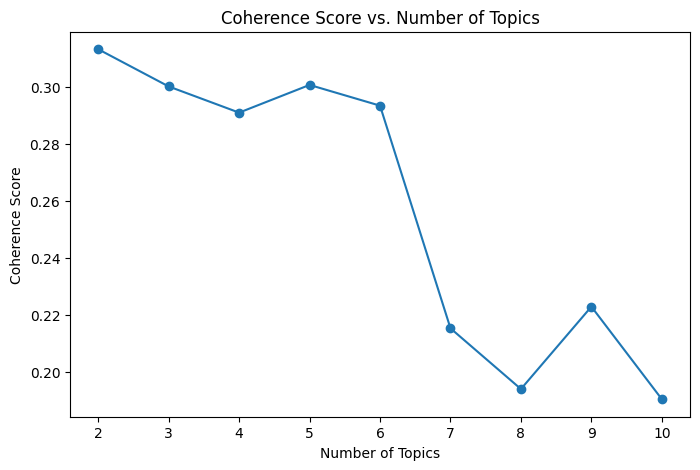

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define a function to compute coherence scores
def calculate_coherence(lda_model, tfidf_matrix, top_n=15, coherence_measure='c_v'):
    coherence_scores = []
    topic_term_matrix = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
    
    for topic_weights in topic_term_matrix:
        top_term_indices = topic_weights.argsort()[:-top_n-1:-1]
        #top_terms = [tfidf_vectorizer.get_feature_names()[i] for i in top_term_indices]
        
        # Compute pairwise cosine similarity between top terms
        similarity_matrix = cosine_similarity(tfidf_matrix[:, top_term_indices])
        
        # Compute coherence based on the chosen measure
        if coherence_measure == 'c_v':
            coherence_score = np.mean(similarity_matrix[np.triu_indices(top_n, k=1)])
        
        coherence_scores.append(coherence_score)
    
    return np.mean(coherence_scores)

# Evaluate coherence for different numbers of topics
coherence_scores = []
for num_topics in range(min_topics, max_topics + 1):
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tfidf_matrix)  
    
    # Extract topic-term matrix
    topic_term_matrix = lda_model.components_
    
    # Transform topic-term matrix into a list of lists of words
    topics_words = []
    for topic_weights in topic_term_matrix:
        top_word_indices = topic_weights.argsort()[:-15-1:-1]  # Top 15 words per topic
        topic_words = [tfidf_vectorizer.get_feature_names()[i] for i in top_word_indices]
        topics_words.append(topic_words)
    
    # Compute coherence score
    coherence_score = calculate_coherence(lda_model, tfidf_matrix, top_n=15, coherence_measure='c_v')
    coherence_scores.append(coherence_score)

# Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(range(min_topics, max_topics + 1), coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

In [58]:
# Apply LDA
n_topics = 6  # Number of topics 
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

# Extracting keywords for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
topic_keywords = []

for topic_idx, topic in enumerate(lda.components_):
    top_keyword_idxs = topic.argsort()[:-15-1:-1]  # Extract top 15 keywords for each topic
    top_keywords = [feature_names[i] for i in top_keyword_idxs]
    topic_keywords.append(top_keywords)

outputStr = ""
# Print keywords for each topic
for i, keywords in enumerate(topic_keywords):
    outputStr = outputStr + f"Category {i + 1}: {', '.join(keywords)} \n"

print(outputStr)

Category 1: price, rate, service, customer, promotion, company, comcast, contract, worst, year, package, sign, rep, rude, poor 
Category 2: speed, mbps, download, data, test, internet, usage, blast, slow, high, getting, comcast, paying, faster, advertised 
Category 3: bill, service, comcast, month, told, account, called, charge, customer, fee, call, pay, said, payment, credit 
Category 4: modem, box, comcast, problem, router, cable, new, tech, technician, service, computer, internet, replaced, wireless, working 
Category 5: service, comcast, internet, channel, cable, tv, customer, time, company, month, problem, year, pay, go, box 
Category 6: service, comcast, call, called, phone, time, day, tech, told, cable, said, technician, customer, appointment, hour 



In [59]:
from openai import OpenAI

client = OpenAI(api_key = "")

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You have been provided with keywords extracted from an LDA (Latent Dirichlet Allocation) analysis of customer complaints from Comcast. Your task is to identify the potential topic names or themes represented by each set of keywords. he response should only include the topic names and nothing more."},
    {"role": "user", "content": outputStr}
  ]
)

topic_names = completion.choices[0].message.content
print(topic_names)


1. Customer Service Experience
2. Internet Speed and Performance
3. Billing and Charges
4. Equipment and Technical Issues
5. Cable TV Service
6. Customer Support and Appointment Scheduling


In [60]:
# Split the string into lines
topic_lines = topic_names.split('\n')

# Extract each topic name separately
topic_names_list = [line.split('. ')[1] for line in topic_lines if line.strip()]

# Function to get the topic names for each document
def get_topic_name(lda_model, tfidf_matrix, topic_names_list):
    # Transform documents into topic space
    topic_distribution = lda_model.transform(tfidf_matrix)
    # Get the index of the highest probability topic for each document
    top_topic_idx = np.argmax(topic_distribution, axis=1)
    # Map the topic index to the corresponding topic name
    topic_names = [topic_names_list[idx] for idx in top_topic_idx]
    return topic_names

consumerAffairs['Dominant_Topic_Name'] = get_topic_name(lda, tfidf_matrix, topic_names_list)
consumerAffairs


,author,posted_on,rating,text,Cleaned_Text,Dominant_Topic_Name
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,used love comcast constant update internet cab...,Cable TV Service
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,comcast worst internet provider taking online ...,Cable TV Service
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,give negative star star review never worked in...,Cable TV Service
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,worst experience far since install nothing pro...,Customer Support and Appointment Scheduling
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,check contract sign comcast advertised offer m...,Billing and Charges
...,...,...,...,...,...,...
5654,"Brandye of San Ramon, CA","March 12, 2006",0,"Last year, we bought the Nascar In Car package...",last year bought nascar car package comcast ch...,Customer Support and Appointment Scheduling
5655,"Paul of Chicago, IL","March 12, 2006",0,Their billing department is horrid. If you dec...,billing department horrid decide use comcast f...,Billing and Charges
5656,"Autumn of Knoxville, TN","March 6, 2006",0,"Ordered ""On Demand"" movie for the 1st time in ...",ordered demand movie time bill charge movie or...,Billing and Charges
5657,"Tina of Villa Rica, GA","Feb. 22, 2006",0,I am being ripped of by Comcast Cable regardin...,ripped comcast cable regarding billing cable y...,Billing and Charges


In [61]:
"""

import numpy as np

# Function to get the dominant topic for each document
def get_dominant_topic(lda_model, tfidf_matrix):
    # Transform documents into topic space
    topic_distribution = lda_model.transform(tfidf_matrix)
    # Get the index of the dominant topic for each document
    dominant_topics = np.argmax(topic_distribution, axis=1)
    return dominant_topics

# Add a column to the DataFrame to store the dominant topic for each document
consumerAffairs['Dominant_Topic'] = get_dominant_topic(lda, tfidf_matrix)
consumerAffairs

"""


"\n\nimport numpy as np\n\n# Function to get the dominant topic for each document\ndef get_dominant_topic(lda_model, tfidf_matrix):\n    # Transform documents into topic space\n    topic_distribution = lda_model.transform(tfidf_matrix)\n    # Get the index of the dominant topic for each document\n    dominant_topics = np.argmax(topic_distribution, axis=1)\n    return dominant_topics\n\n# Add a column to the DataFrame to store the dominant topic for each document\nconsumerAffairs['Dominant_Topic'] = get_dominant_topic(lda, tfidf_matrix)\nconsumerAffairs\n\n"

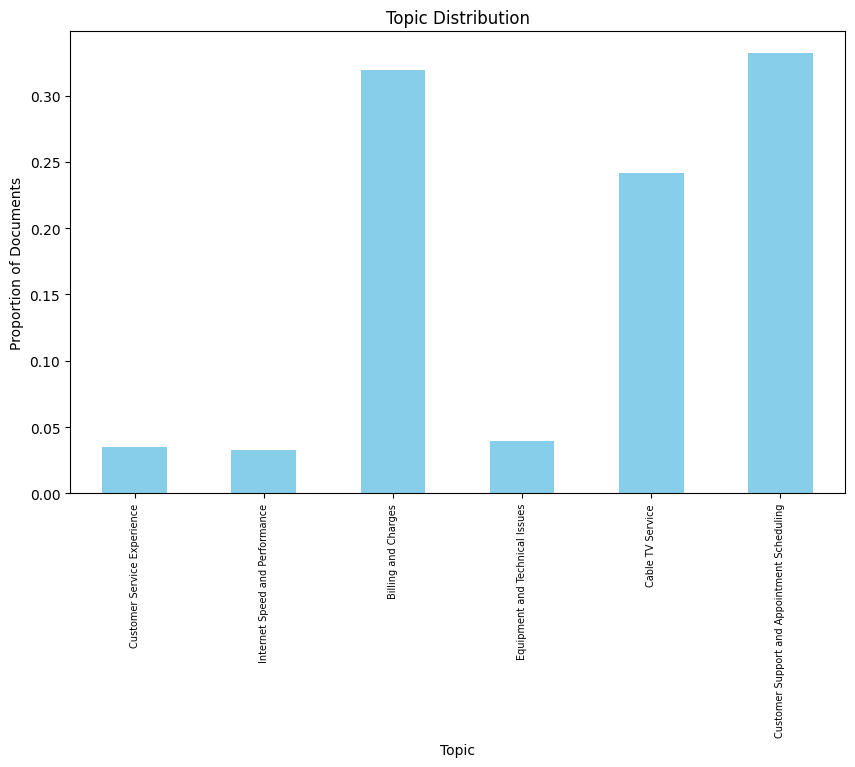

In [62]:
# Extracting document-topic matrix
doc_topic_matrix = lda.transform(tfidf_matrix)

# Create a DataFrame to hold the document-topic matrix
doc_topic_df = pd.DataFrame(doc_topic_matrix, columns=[f"Topic {i+1}" for i in range(n_topics)])

# Plotting the topic distribution
plt.figure(figsize=(10, 6))
doc_topic_df.mean().plot(kind='bar', color='skyblue')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Proportion of Documents')
plt.xticks(ticks=range(n_topics), labels=topic_names_list, rotation=90, fontsize=7)
plt.show()


### *Sentiment*

In [63]:
'''

from transformers import pipeline

# Load pre-trained sentiment analysis model
nlp = pipeline("sentiment-analysis")

def get_sentiment_score(text):
    text_str = str(text)
    truncated_text = text_str[:512]  
    sentiment_result = nlp(truncated_text)[0]
    if sentiment_result["label"] == 'NEGATIVE':
        return sentiment_result['score']*-1
    else:
        return sentiment_result['score']

consumerAffairs['Sentiment_Score'] = consumerAffairs['text'].apply(get_sentiment_score)
consumerAffairs


'''


'\n\nfrom transformers import pipeline\n\n# Load pre-trained sentiment analysis model\nnlp = pipeline("sentiment-analysis")\n\ndef get_sentiment_score(text):\n    text_str = str(text)\n    truncated_text = text_str[:512]  \n    sentiment_result = nlp(truncated_text)[0]\n    if sentiment_result["label"] == \'NEGATIVE\':\n        return sentiment_result[\'score\']*-1\n    else:\n        return sentiment_result[\'score\']\n\nconsumerAffairs[\'Sentiment_Score\'] = consumerAffairs[\'text\'].apply(get_sentiment_score)\nconsumerAffairs\n\n\n'

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

custom_lexicon = {
    'fantastic': 50.0,   
    'terrible': -50.0,   
    'suck': -50.0,
    'worst': -50,
    'poor': -50,

    'slow': -30.0,
    'fast': 30.0,
    'crash': -30.0,
    
    'unhelpful': -25,
    'overcharged': -30.0,
    'rude': -20,
    'hidden fees': -30,
    'fee': -10,  
    'charge': -10,  
    'unauthorized': -15,
}

# Update analyzer with custom lexicon
analyzer.lexicon.update(custom_lexicon)

# Function to calculate sentiment score
def get_sentiment(text):
    if isinstance(text, str):
        vs = analyzer.polarity_scores(text)
        return vs['compound']
    else:
        return None

# Apply sentiment analysis to each complaint
consumerAffairs['Sentiment_Score'] = consumerAffairs['text'].apply(get_sentiment)
consumerAffairs

,author,posted_on,rating,text,Cleaned_Text,Dominant_Topic_Name,Sentiment_Score
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,used love comcast constant update internet cab...,Cable TV Service,-0.9888
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,comcast worst internet provider taking online ...,Cable TV Service,-0.9993
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,give negative star star review never worked in...,Cable TV Service,-0.9994
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,worst experience far since install nothing pro...,Customer Support and Appointment Scheduling,-0.9938
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,check contract sign comcast advertised offer m...,Billing and Charges,0.6921
...,...,...,...,...,...,...,...
5654,"Brandye of San Ramon, CA","March 12, 2006",0,"Last year, we bought the Nascar In Car package...",last year bought nascar car package comcast ch...,Customer Support and Appointment Scheduling,0.3818
5655,"Paul of Chicago, IL","March 12, 2006",0,Their billing department is horrid. If you dec...,billing department horrid decide use comcast f...,Billing and Charges,-0.8016
5656,"Autumn of Knoxville, TN","March 6, 2006",0,"Ordered ""On Demand"" movie for the 1st time in ...",ordered demand movie time bill charge movie or...,Billing and Charges,-0.9777
5657,"Tina of Villa Rica, GA","Feb. 22, 2006",0,I am being ripped of by Comcast Cable regardin...,ripped comcast cable regarding billing cable y...,Billing and Charges,-0.6237


In [65]:
# Sample sentences
neutral_sentence = "The meeting is scheduled for 3 PM tomorrow."
negative_sentence = "I am completely devastated by the horrendous experience and the catastrophic failure of the product."
positive_sentence = "I am absolutely thrilled with the amazing customer service and the outstanding quality of the product."

# Calculate sentiment scores
neutral_score = analyzer.polarity_scores(neutral_sentence)['compound']
negative_score = analyzer.polarity_scores(negative_sentence)['compound']
positive_score = analyzer.polarity_scores(positive_sentence)['compound']

# Print the results
print(f"Neutral Sentence Score: {neutral_score}")
print(f"Negative Sentence Score: {negative_score}")
print(f"Positive Sentence Score: {positive_score}")

Neutral Sentence Score: 0.0
Negative Sentence Score: -0.9392
Positive Sentence Score: 0.8999


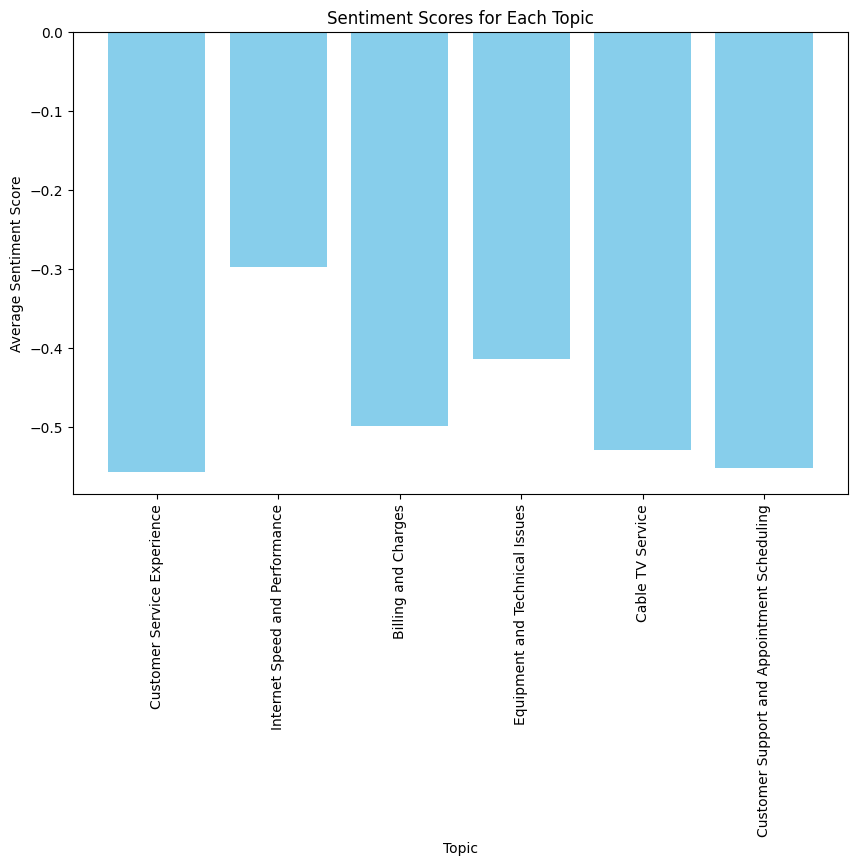

In [66]:
# Create an empty DataFrame to store aggregated sentiment scores for each topic
topic_sentiment_scores = pd.DataFrame(index=[topic_names_list], columns=['Sentiment_Score'])

# Aggregate sentiment scores for each topic
for topic_name in topic_names_list:
    # Extract documents belonging to the current topic
    topic_documents = consumerAffairs.loc[consumerAffairs['Dominant_Topic_Name'] == topic_name, 'Sentiment_Score']
    # Calculate average sentiment score for the topic
    topic_sentiment_scores.loc[topic_name, 'Sentiment_Score'] = topic_documents.mean()


# Visualize sentiment scores for each topic
plt.figure(figsize=(10, 6))
plt.bar(range(n_topics), topic_sentiment_scores['Sentiment_Score'], color='skyblue')
plt.title('Sentiment Scores for Each Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.xticks(range(n_topics), topic_names_list, rotation=90)  
plt.show()


# **Trending**

### *Over Time*

In [67]:
consumerAffairs['posted_on'] = pd.to_datetime(consumerAffairs['posted_on'])
consumerAffairs['Year-Month'] = consumerAffairs['posted_on'].dt.to_period('M')
consumerAffairs = consumerAffairs.sort_values(by=['posted_on','Year-Month'], ascending=False)
consumerAffairs

,author,posted_on,rating,text,Cleaned_Text,Dominant_Topic_Name,Sentiment_Score,Year-Month
0,"Alantae of Chesterfeild, MI",2016-11-22,1,I used to love Comcast. Until all these consta...,used love comcast constant update internet cab...,Cable TV Service,-0.9888,2016-11
1368,"mick of Maple Grove, MN",2016-11-22,1,Only thing besides HBO worth watching was Vice...,thing besides hbo worth watching viceland pay ...,Cable TV Service,0.3818,2016-11
1369,"Dmytro of Minneapolis, MN",2016-11-22,1,The most cheating company which I ever seen. S...,cheating company ever seen help connect box ex...,Cable TV Service,-0.8687,2016-11
1370,"Delores of Baltimore, MD",2016-11-21,1,Person (male) was let into my home. Left after...,person male let home left ask id supposed truc...,Customer Support and Appointment Scheduling,-0.9972,2016-11
1371,"Tamara of Elkton, VA",2016-11-21,1,I have had Comcast TV/Internet/Phone bundle fo...,comcast bundle almost year six month ago charg...,Cable TV Service,-0.5729,2016-11
...,...,...,...,...,...,...,...,...
1363,"James of Ellicott City, MD",2003-02-15,0,"That worked for 2 days, then the internet conn...",worked day internet connection went called bac...,Customer Support and Appointment Scheduling,0.5171,2003-02
1364,"Kevin of Fords, NJ",2002-11-01,0,Comcast has been overbilling me for a year on ...,comcast overbilling year cable modem service s...,Billing and Charges,-0.9787,2002-11
1365,"Michael of Detroit, MI",2001-06-25,0,I ordered cable Internet service from Comcast ...,ordered cable internet service comcast may kne...,Customer Support and Appointment Scheduling,-0.9369,2001-06
1366,"Renee of Philadelphia, PA",2001-06-07,0,I ordered cable internet service from Comcast ...,ordered cable internet service comcast cable d...,Billing and Charges,-0.8789,2001-06


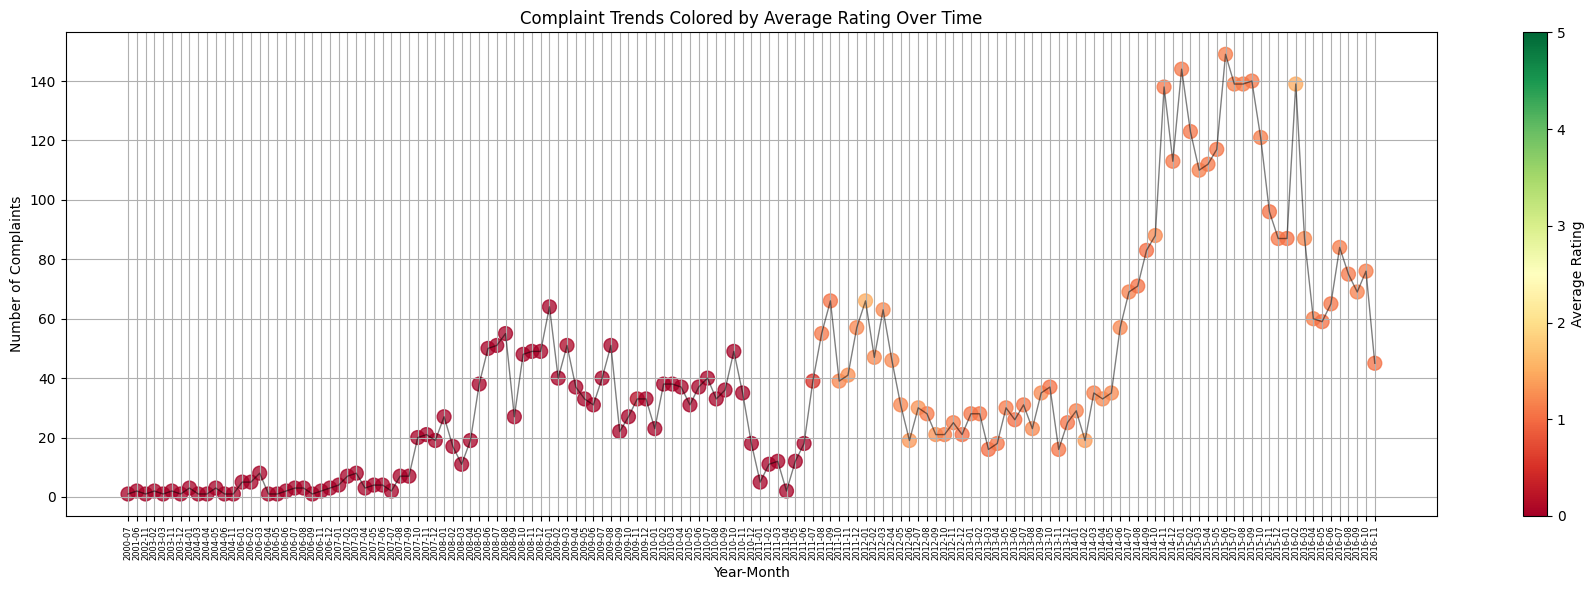

In [68]:

# Group complaints by time period and calculate average rating and count of complaints
complaints_by_month = consumerAffairs.groupby('Year-Month').agg({'rating': 'mean', 'text': 'size'})

# Define color map based on average rating values
cmap = plt.get_cmap('RdYlGn')  # Red to green colormap
norm = plt.Normalize(vmin=0, vmax=5)
colors = cmap(norm(complaints_by_month['rating']))

# Plot complaint trends over time with colored points based on average rating
plt.figure(figsize=(18, 6))
plt.scatter(complaints_by_month.index.astype(str), complaints_by_month['text'], c=colors, s=100, alpha=0.75)
plt.plot(complaints_by_month.index.astype(str), complaints_by_month['text'], color='black', alpha=0.5, linewidth=1)  # Connect points with lines
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Average Rating')

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.title('Complaint Trends Colored by Average Rating Over Time')
plt.xticks(rotation=90, fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()


Sudden rise in ratings by 1 star after mid 2011.
Possibly removed customer's ability to rate 0 stars?

High amount of complaints starting mid 2014

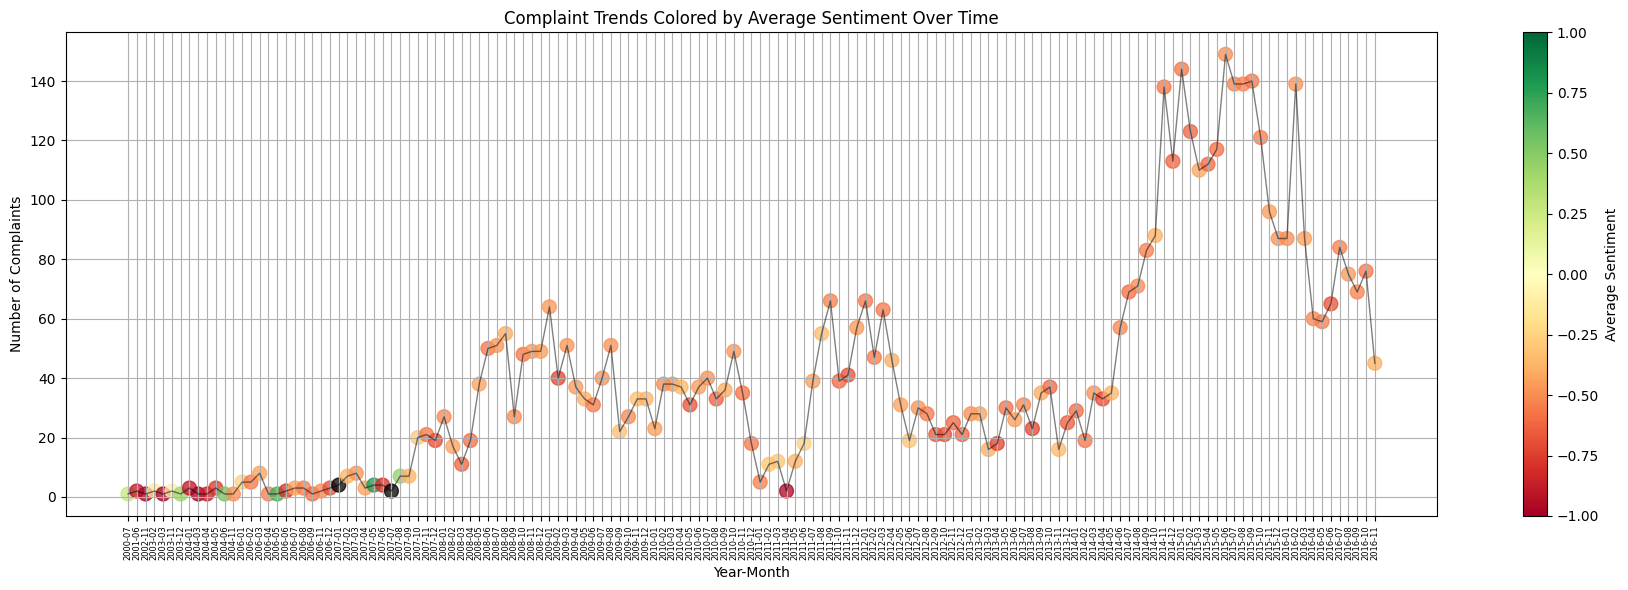

In [69]:
# Group complaints by time period and calculate average rating and count of complaints
complaints_by_month = consumerAffairs.groupby('Year-Month').agg({'Sentiment_Score': 'mean', 'text': 'size'})

# Define color map based on average rating values
cmap = plt.get_cmap('RdYlGn')  # Red to green colormap
norm = plt.Normalize(vmin=-1, vmax=1)
colors = cmap(norm(complaints_by_month['Sentiment_Score']))

# Plot complaint trends over time with colored points based on average rating
plt.figure(figsize=(18, 6))
plt.scatter(complaints_by_month.index.astype(str), complaints_by_month['text'], c=colors, s=100, alpha=0.75)
plt.plot(complaints_by_month.index.astype(str), complaints_by_month['text'], color='black', alpha=0.5, linewidth=1)  # Connect points with lines
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Average Sentiment')

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.title('Complaint Trends Colored by Average Sentiment Over Time')
plt.xticks(rotation=90, fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()


Positive reviews in early to mid 2007?

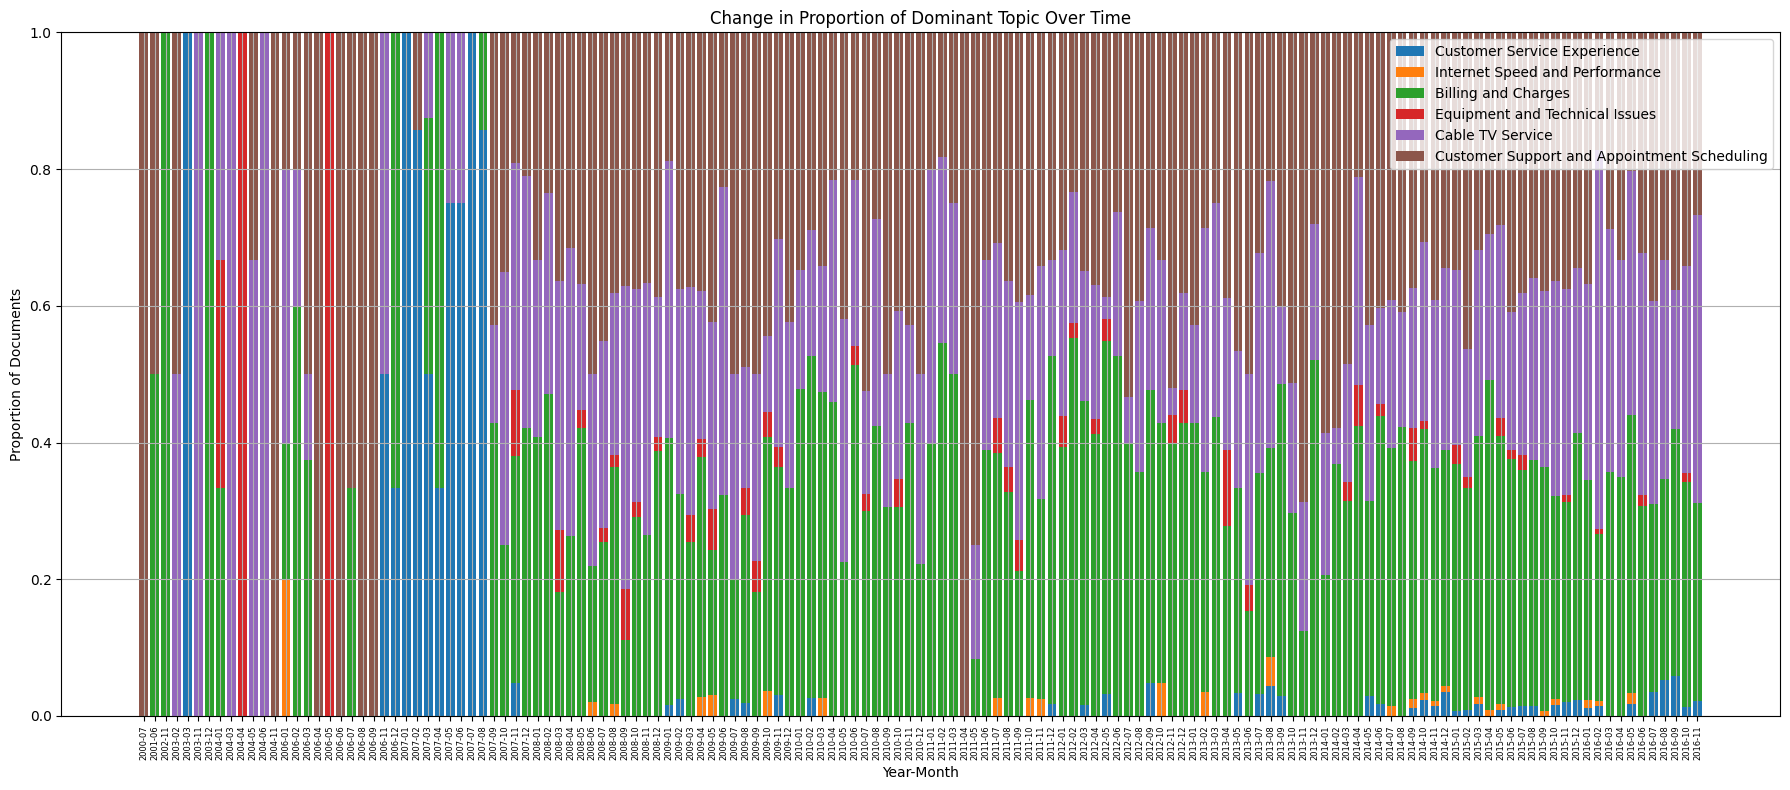

In [70]:
# Group the data by year-month and dominant topic, and count the number of documents
topic_counts = consumerAffairs.groupby(['Year-Month', 'Dominant_Topic_Name']).size().unstack(fill_value=0)

# Calculate the proportion of documents for each dominant topic within each time period
topic_proportions = topic_counts.div(topic_counts.sum(axis=1), axis=0)

# Convert Period index to string
topic_proportions.index = topic_proportions.index.strftime('%Y-%m')

# Plot the proportions over time for each dominant topic
plt.figure(figsize=(18, 8))
bottom = None
for topic_name in topic_names_list:
    plt.bar(topic_proportions.index, topic_proportions[topic_name], label=topic_name, bottom=bottom)
    if bottom is None:
        bottom = topic_proportions[topic_name]
    else:
        bottom += topic_proportions[topic_name]
plt.title('Change in Proportion of Dominant Topic Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Proportion of Documents')
plt.legend(labels=topic_names_list)
plt.xticks(rotation=90, fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()


### *Geographic*

In [71]:
# Mapping dictionary for state names to acronyms
state_mapping = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'FLORIDA': 'FL', 'GEORGIA': 'GA',
    'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA',
    'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO',
    'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH',
    'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT',
    'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}

# Function to extract state acronym from author column
def extract_state(author):
    parts = author.split(',')
    state = parts[-1].strip().upper()  # Extract and uppercase the state part
    if state == "OTHER":
        return state
    if len(state) == 2 and state.isalpha():  # Check if it's a valid state acronym
        return state
    else:
        return state_mapping.get(state, 'OTHER')  # Map state names to acronyms

# Apply the function to extract state acronyms
consumerAffairs['State'] = consumerAffairs['author'].apply(extract_state)
consumerAffairs

,author,posted_on,rating,text,Cleaned_Text,Dominant_Topic_Name,Sentiment_Score,Year-Month,State
0,"Alantae of Chesterfeild, MI",2016-11-22,1,I used to love Comcast. Until all these consta...,used love comcast constant update internet cab...,Cable TV Service,-0.9888,2016-11,MI
1368,"mick of Maple Grove, MN",2016-11-22,1,Only thing besides HBO worth watching was Vice...,thing besides hbo worth watching viceland pay ...,Cable TV Service,0.3818,2016-11,MN
1369,"Dmytro of Minneapolis, MN",2016-11-22,1,The most cheating company which I ever seen. S...,cheating company ever seen help connect box ex...,Cable TV Service,-0.8687,2016-11,MN
1370,"Delores of Baltimore, MD",2016-11-21,1,Person (male) was let into my home. Left after...,person male let home left ask id supposed truc...,Customer Support and Appointment Scheduling,-0.9972,2016-11,MD
1371,"Tamara of Elkton, VA",2016-11-21,1,I have had Comcast TV/Internet/Phone bundle fo...,comcast bundle almost year six month ago charg...,Cable TV Service,-0.5729,2016-11,VA
...,...,...,...,...,...,...,...,...,...
1363,"James of Ellicott City, MD",2003-02-15,0,"That worked for 2 days, then the internet conn...",worked day internet connection went called bac...,Customer Support and Appointment Scheduling,0.5171,2003-02,MD
1364,"Kevin of Fords, NJ",2002-11-01,0,Comcast has been overbilling me for a year on ...,comcast overbilling year cable modem service s...,Billing and Charges,-0.9787,2002-11,NJ
1365,"Michael of Detroit, MI",2001-06-25,0,I ordered cable Internet service from Comcast ...,ordered cable internet service comcast may kne...,Customer Support and Appointment Scheduling,-0.9369,2001-06,MI
1366,"Renee of Philadelphia, PA",2001-06-07,0,I ordered cable internet service from Comcast ...,ordered cable internet service comcast cable d...,Billing and Charges,-0.8789,2001-06,PA


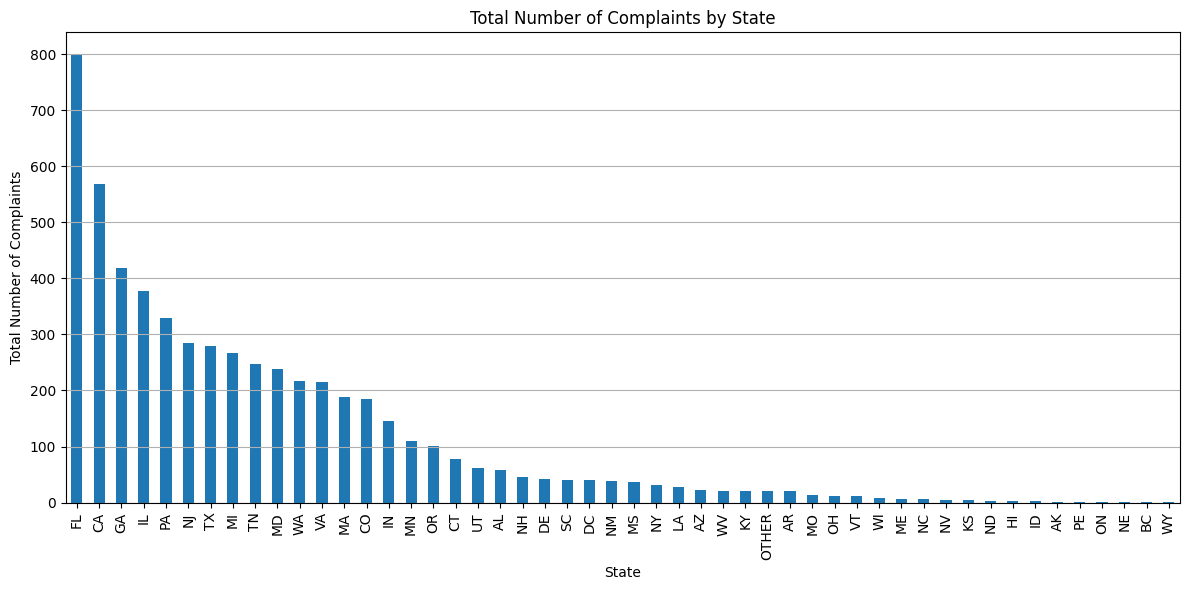

In [72]:
complaints_per_state = consumerAffairs.groupby(['State']).size().reset_index(name='Complaints')


plt.figure(figsize=(12, 6))
complaints_per_state.groupby('State')['Complaints'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Complaints by State')
plt.xlabel('State')
plt.ylabel('Total Number of Complaints')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [73]:
import plotly.express as px
import plotly.io as pio


complaints_per_state_per_month = consumerAffairs.groupby(['Year-Month','State']).size().reset_index(name='Complaints')

max_complaints = complaints_per_state_per_month['Complaints'].max()
min_complaints = complaints_per_state_per_month['Complaints'].min()

fig = px.choropleth(complaints_per_state_per_month, 
                    locations='State', 
                    locationmode='USA-states',
                    color='Complaints',
                    hover_name='State',
                    animation_frame='Year-Month',
                    scope='usa',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Complaints per State Over Time')
# Ensure color scale remains consistent
fig.update_layout(coloraxis_colorbar=dict(title='Complaints', lenmode='fraction', len=0.75), 
                  coloraxis=dict(cmin=min_complaints, cmax=max_complaints))

pio.write_html(fig, file='complaints_per_state.html', auto_open=True)
